In [4]:
!pip install rouge/requirements.txt
!pip install rouge-score

ERROR: Invalid requirement: 'rouge/requirements.txt'
Hint: It looks like a path. File 'rouge/requirements.txt' does not exist.


In [2]:
!pip install scikit-learn

In [5]:
import pandas as pd
import numpy as np
import math
from rouge_score import rouge_scorer
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

In [19]:
WikiHow_sample_leq512 = pd.read_csv('WikiHow_sample_leq512_withsummary.csv')
WikiHow_sample_in1024 = pd.read_csv('WikiHow_sample_in1024_withsummary.csv')

In [36]:
WikiHow_sample_in1024 = pd.read_csv('WikiHow_sample_in1024_withsummary.csv')

In [ ]:
i = 0
df_cropped = WikiHow_sample_leq512.loc[0:36200,:]
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'], use_stemmer=True)
for headline, summary in zip(df_cropped['headline'],df_cropped['summary']):
    scores = scorer.score(summary,headline)
    WikiHow_sample_leq512.loc[i,'Rouge1'] = scores['rouge1'].fmeasure
    WikiHow_sample_leq512.loc[i,'Rouge2'] = scores['rouge2'].fmeasure
    WikiHow_sample_leq512.loc[i,'RougeL'] = scores['rougeL'].fmeasure
    WikiHow_sample_leq512.loc[i,'RougeLsum'] = scores['rougeLsum'].fmeasure
    i += 1

In [ ]:
df_cropped_scored = WikiHow_sample_leq512.loc[0:36200,:]
df_cropped_scored['text_length'].corr(df_cropped_scored['Rouge1'])
corr_table = {'Rouge1': [df_cropped_scored['text_length'].corr(df_cropped_scored['Rouge1'])], 
        'Rouge2': [df_cropped_scored['text_length'].corr(df_cropped_scored['Rouge2'])], 
        'RougeL': [df_cropped_scored['text_length'].corr(df_cropped_scored['RougeL'])],
        'RougeLsum': [df_cropped_scored['text_length'].corr(df_cropped_scored['RougeLsum'])]} 
correlation = pd.DataFrame(corr_table, index=['text_length'])

In [10]:
correlation

,Rouge1,Rouge2,RougeL,RougeLsum
text_length,0.208014,0.07995,0.134772,0.182112


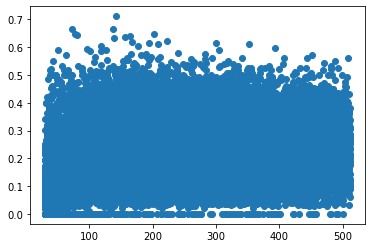

In [13]:
plt.plot(WikiHow_sample_leq512['text_length'],WikiHow_sample_leq512['Rouge1'],'o')

In [37]:
i = 0
df_cropped = WikiHow_sample_in1024.loc[0:8942,:]
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'], use_stemmer=True)
for headline, summary in zip(df_cropped['headline'],df_cropped['summary']):
    scores = scorer.score(summary,headline)
    WikiHow_sample_in1024.loc[i,'Rouge1'] = scores['rouge1'].fmeasure
    WikiHow_sample_in1024.loc[i,'Rouge2'] = scores['rouge2'].fmeasure
    WikiHow_sample_in1024.loc[i,'RougeL'] = scores['rougeL'].fmeasure
    WikiHow_sample_in1024.loc[i,'RougeLsum'] = scores['rougeLsum'].fmeasure
    i += 1

In [38]:
df_cropped_scored2 = WikiHow_sample_in1024.loc[0:8942,:]
df_cropped_scored2['text_length'].corr(df_cropped_scored2['Rouge1'])
corr_table2 = {'Rouge1': [df_cropped_scored2['text_length'].corr(df_cropped_scored2['Rouge1'])], 
        'Rouge2': [df_cropped_scored2['text_length'].corr(df_cropped_scored2['Rouge2'])], 
        'RougeL': [df_cropped_scored2['text_length'].corr(df_cropped_scored2['RougeL'])],
        'RougeLsum': [df_cropped_scored2['text_length'].corr(df_cropped_scored2['RougeLsum'])]} 
correlation2 = pd.DataFrame(corr_table2, index=['text_length'])

In [39]:
correlation2

,Rouge1,Rouge2,RougeL,RougeLsum
text_length,-0.036611,-0.040533,-0.089067,-0.037679


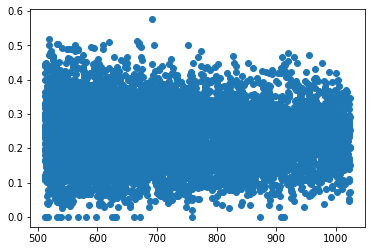

In [47]:
plt.plot(WikiHow_sample_in1024['text_length'],WikiHow_sample_in1024['Rouge1'],'o')

In [ ]:
# WikiHow_sample_all = 

In [7]:
WikiHow_sample_leq512.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,headline,title,text,text_length,summary,train_length,score,"('Rouge1', 'Rouge2', 'RougeL', 'RougeLsum')",Rouge1,Rouge2,RougeL,RougeLsum
0,0,0,0,0,"\nAvoid abrasive clothing-on-skin contact.,\nR...",How to Care for Skin During Winter3,While it's always a good idea to cover up whe...,397,itching is a great way to cause infections by ...,392,<rouge_score.rouge_scorer.RougeScorer object a...,empty,0.135593,0.00,0.101695,0.135593
1,1,1,1,1,\nGo to Data tab and select From Other Sources...,How to Embed a SQL Query in Microsoft Excel,";\n,, Select “ODBC DSN” from the available opt...",70,select the database and table as appropriate i...,64,<rouge_score.rouge_scorer.RougeScorer object a...,empty,0.172840,0.10,0.160494,0.160494
2,2,2,2,2,"\nTease her.,\nMake up ridiculous stories.,\nE...",How to Reply to One Word Texts from Girls2,Since she is only sending you one word text m...,469,make sure you are appropriate with your teasin...,464,<rouge_score.rouge_scorer.RougeScorer object a...,empty,0.244898,0.00,0.163265,0.163265
3,3,3,3,3,"\nLaunch the Microsoft Word mobile app.,\nOpen...",How to Check a Word Count in Microsoft Word3,"On your smartphone or tablet, tap on the Word...",218,the app will usually open the last document yo...,210,<rouge_score.rouge_scorer.RougeScorer object a...,empty,0.423077,0.12,0.307692,0.346154
4,4,4,4,4,\nWhen thinking of confronting someone(if you ...,How to Verbally Express Yourself Without Fear,know what you wish to achieve with this verba...,143,donna brazile: your intentions must be absolut...,141,<rouge_score.rouge_scorer.RougeScorer object a...,empty,0.214765,0.00,0.107383,0.147651


In [32]:
# linear regression and anova table
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [33]:
model = ols('Rouge1 ~ C(text_length)', data=df_cropped_scored[['text_length', 'Rouge1']]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [35]:
anova_table

,sum_sq,df,F,PR(>F)
C(text_length),42.592242,480.0,10.224895,0.0
Residual,309.985856,35720.0,NaN,NaN
